In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Color Dictionary
keys = ["red", "salmon","tan",'light_green','aqua_green','purple']
values = ["#FF9AA2", "#FFB7B2","#FFDAC1",'#E2F0CB','#B5EAD7','#C7CEEA']
color_dct = dict(zip(keys, values))

color_dct['red']

'#FF9AA2'

In [3]:
df_op = pd.read_csv('/Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/operating_reports/operations_v2.csv')

df_op['Year'] = df_op['Year'].astype(int)
df_op.sort_values(by=['Year'], inplace=True)
df_op['Year_datetime'] = pd.to_datetime(df_op['Year'].astype(str), format='%Y')
df_op.drop(columns=['Year'], inplace=True)
df_op.set_index('Year_datetime', inplace=True)

In [69]:
df = df_op.copy()
df['Minor Revenue Sources'] = df['Other Revenue'] + df['Tax']
df.drop(columns=['Other Revenue','Tax'], inplace=True)
df['Overages'] = df['Casual Overages'] + df['Annual Overages']
df.drop(columns=['Casual Overages','Annual Overages'], inplace=True)
df.drop(columns=['Refunds & Discounts'], inplace=True)
df = df[['Annual Membership', 'Sponsorship', 'Casual Membership', 'Overages', 'Minor Revenue Sources']]
df['Total Revenue'] = df['Annual Membership'] + df['Sponsorship'] + df['Casual Membership'] + df['Overages'] + df['Minor Revenue Sources']
df

,Annual Membership,Sponsorship,Casual Membership,Overages,Minor Revenue Sources,Total Revenue
Year_datetime,,,,,,
2013-01-01,9131875.00,11686000.00,3988089.00,2307590.0,60189.00,27173743.00
2015-01-01,12025114.00,12702686.00,4851137.00,5678824.0,2610869.00,37868630.00
2016-01-01,18475590.00,9598250.00,6545247.00,6132735.0,3104057.00,43855879.00
2017-01-01,24780176.00,11292597.00,6313352.00,5208102.0,3203048.00,50797275.00
2018-01-01,24453578.50,16417149.06,7638695.85,4086411.1,3701998.98,56297833.49
2019-01-01,24733535.16,11182175.38,10739976.92,4374763.6,3732301.09,54762752.15


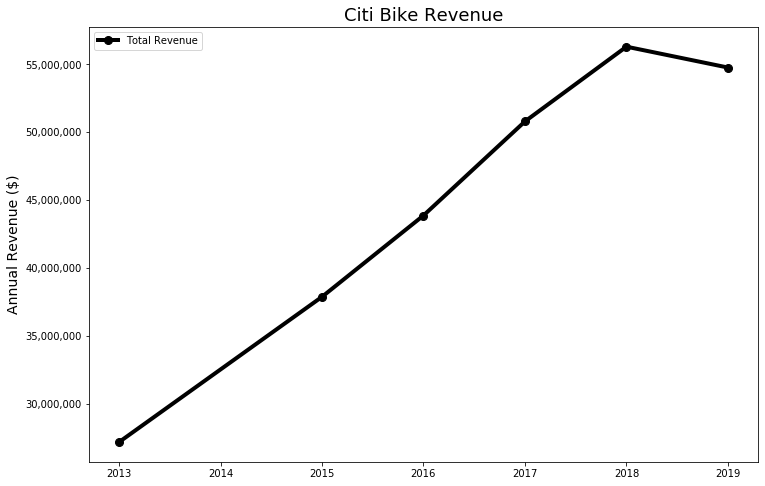

In [130]:
from matplotlib.pyplot import figure
import matplotlib.ticker as tkr

figure(figsize=(12, 8))

def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func)  # make formatter

ax = plt.subplot(111)
ax.yaxis.set_major_formatter(y_format)  # set formatter to needed axis

ax1 = plt.plot( df.index.values, df[['Total Revenue']], marker='o',markersize=8,
         color='k', linewidth=4, label='Total Revenue')

plt.xlabel('') 
plt.ylabel('Annual Revenue ($)',size=14)
plt.title('Citi Bike Revenue',size=18)

plt.legend(loc=2)
# plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('total_revenue.png') 
plt.show()


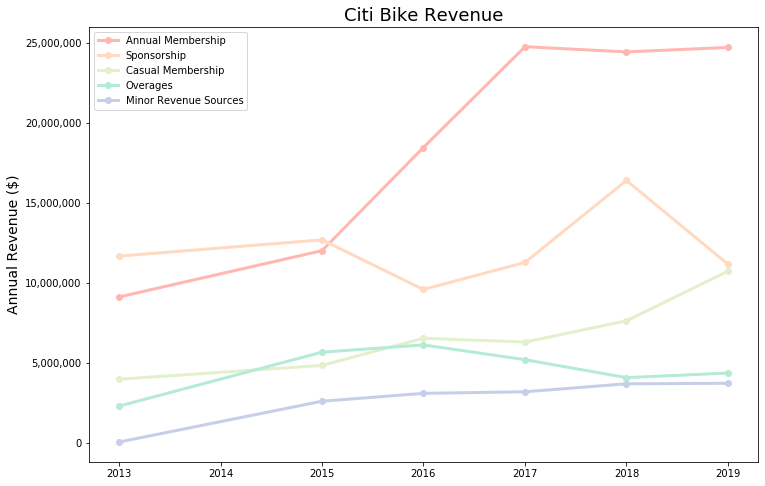

In [131]:
from matplotlib.pyplot import figure
import matplotlib.ticker as tkr

figure(figsize=(12, 8))

def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func)  # make formatter

ax = plt.subplot(111)
ax.yaxis.set_major_formatter(y_format)  # set formatter to needed axis

ax1 = plt.plot( df.index.values, df[['Annual Membership']], marker='o',
         color=color_dct["salmon"], linewidth=3, label='Annual Membership')

ax2 = plt.plot( df.index.values, df[['Sponsorship']], marker='o',
         color=color_dct["tan"], linewidth=3, label='Sponsorship')

ax3 = plt.plot( df.index.values, df[['Casual Membership']], marker='o',
         color=color_dct["light_green"], linewidth=3, label='Casual Membership')

ax4 = plt.plot( df.index.values, df[['Overages']], marker='o',
         color=color_dct["aqua_green"], linewidth=3, label='Overages')


ax5 = plt.plot( df.index.values, df[['Minor Revenue Sources']], marker='o',
         color=color_dct["purple"], linewidth=3, label='Minor Revenue Sources')




# x1 = df_growth[['Annual Membership']].plot(figsize=(15,8))
# df_growth[['Casual Membership']].plot(figsize=(15,8))
plt.xlabel('') 
plt.ylabel('Annual Revenue ($)',size=14)
plt.title('Citi Bike Revenue',size=18)

plt.legend(loc=2)
# plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('revenue_by_source.png') 
plt.show()

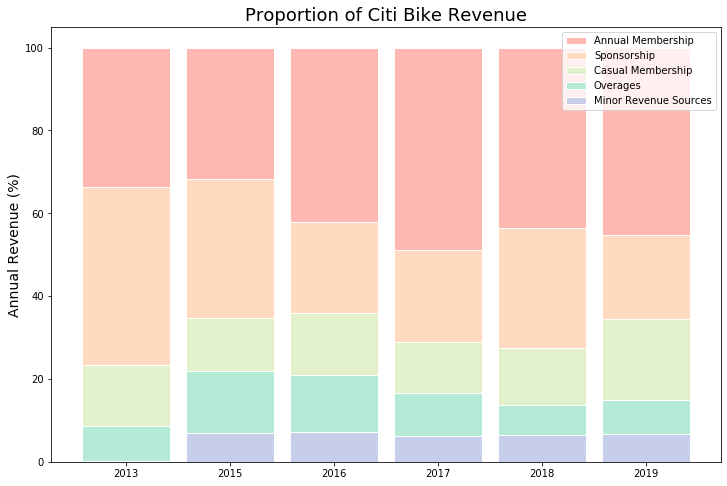

In [132]:
from matplotlib import rc

figure(figsize=(12, 8))

r = np.arange(1,df.shape[0]+1)
# r = [0,1,2,3,4]

ax = plt.subplot(111)

# From raw value to percentage
totals = [i+j+k+l+m for i,j,k,l,m in zip(df['Annual Membership'],
                                     df['Sponsorship'],
                                     df['Casual Membership'],
                                     df['Overages'],
                                     df['Minor Revenue Sources'])]
n_top = [i / j * 100 for i,j in zip(df['Annual Membership'], totals)]
n_top_1 = [i / j * 100 for i,j in zip(df['Sponsorship'], totals)]
n_top_2 = [i / j * 100 for i,j in zip(df['Casual Membership'], totals)]
n_top_3 = [i / j * 100 for i,j in zip(df['Overages'], totals)]
n_top_4 = [i / j * 100 for i,j in zip(df['Minor Revenue Sources'], totals)]

keys = ["red", "salmon","tan",'light_green','aqua_green','purple']

# plot
barWidth = 0.85
names = ('2013','2015','2016','2017','2018', '2019')
# Create green Bars
plt.bar(r, n_top_4, color=color_dct['purple'], edgecolor='white', width=barWidth,
        label="Minor Revenue Sources")
# Create orange Bars
plt.bar(r, n_top_3, bottom=n_top_4, color=color_dct['aqua_green'], edgecolor='white', width=barWidth,
        label='Overages')
# Create blue Bars
plt.bar(r, n_top_2, bottom=[i+j for i,j in zip(n_top_3, n_top_4)], color=color_dct['light_green'], edgecolor='white', width=barWidth,
        label='Casual Membership')
# 
plt.bar(r, n_top_1, bottom=[i+j+k for i,j,k in zip(n_top_2, n_top_3, n_top_4)], color=color_dct['tan'], edgecolor='white', width=barWidth,
        label='Sponsorship')
# 
plt.bar(r, n_top, bottom=[i+j+k+l for i,j,k,l in zip(n_top_1, n_top_2, n_top_3, n_top_4)], color=color_dct['salmon'], edgecolor='white', width=barWidth,
        label='Annual Membership')

# Custom x axis
plt.xticks(r, names)
plt.xlabel("")
plt.ylabel('Annual Revenue (%)',size=14)
plt.title('Proportion of Citi Bike Revenue',size=18)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='', loc='upper right')

# plt.legend(loc=1)
# Show graphic
plt.savefig('revenue_by_source_proportion.png') 
plt.show()


In [77]:
df.columns.to_list()

['Annual Membership',
 'Sponsorship',
 'Casual Membership',
 'Overages',
 'Minor Revenue Sources',
 'Total Revenue']

In [113]:
col_names_mod = df.columns.to_list()
df_growth = df.copy()

for col in col_names_mod:

    growth_rate_lst = [np.nan]

    for i in np.arange(1,df.shape[0]):
        growth_rate_lst.append( 100 * ((df[col][i] - df[col][i-1]) / df[col][i]) )
    
    df_growth[col] = growth_rate_lst
    growth_rate_lst.clear()

df_growth = df_growth[1:]

In [114]:
df_growth

,Annual Membership,Sponsorship,Casual Membership,Overages,Minor Revenue Sources,Total Revenue
Year_datetime,,,,,,
2015-01-01,24.059971,8.003709,17.790633,59.365002,97.694676,28.242075
2016-01-01,34.913505,-32.343771,25.883057,7.401445,15.888497,13.652101
2017-01-01,25.442055,15.004051,-3.673088,-17.753742,3.090525,13.664898
2018-01-01,-1.335582,31.214628,17.350394,-27.449292,13.477880,9.770462
2019-01-01,1.131891,-46.815342,28.876050,6.591270,0.811888,-2.803149


In [115]:
df_growth.index.values

array(['2015-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

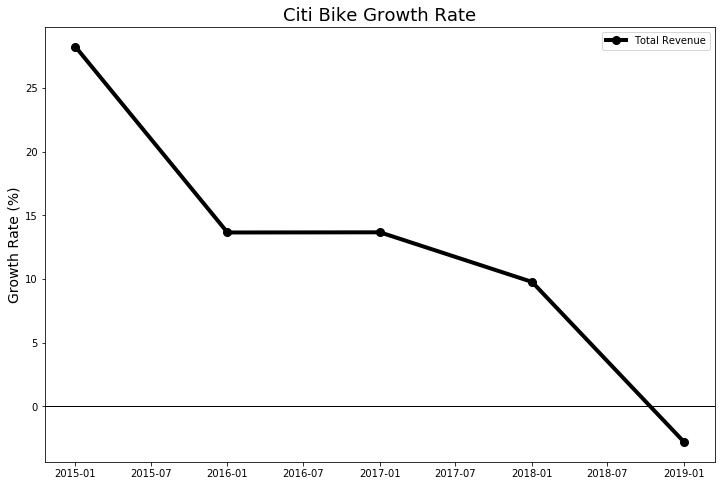

In [133]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8))


# ["red", "salmon","tan",'light_green','aqua_green','purple']
plt.plot( df_growth.index.values, df_growth[['Total Revenue']], marker='o',markersize=8,
         color='k', linewidth=4, label='Total Revenue')

# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")


# x1 = df_growth[['Annual Membership']].plot(figsize=(15,8))
# df_growth[['Casual Membership']].plot(figsize=(15,8))
plt.xlabel('') 
plt.ylabel('Growth Rate (%)',size=14)
plt.title('Citi Bike Growth Rate',size=18)
# plt.grid(which='major', axis='y')
plt.legend(loc=1)
plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('growth_rate_total.png') 
plt.show()

In [117]:
df_growth

,Annual Membership,Sponsorship,Casual Membership,Overages,Minor Revenue Sources,Total Revenue
Year_datetime,,,,,,
2015-01-01,24.059971,8.003709,17.790633,59.365002,97.694676,28.242075
2016-01-01,34.913505,-32.343771,25.883057,7.401445,15.888497,13.652101
2017-01-01,25.442055,15.004051,-3.673088,-17.753742,3.090525,13.664898
2018-01-01,-1.335582,31.214628,17.350394,-27.449292,13.477880,9.770462
2019-01-01,1.131891,-46.815342,28.876050,6.591270,0.811888,-2.803149


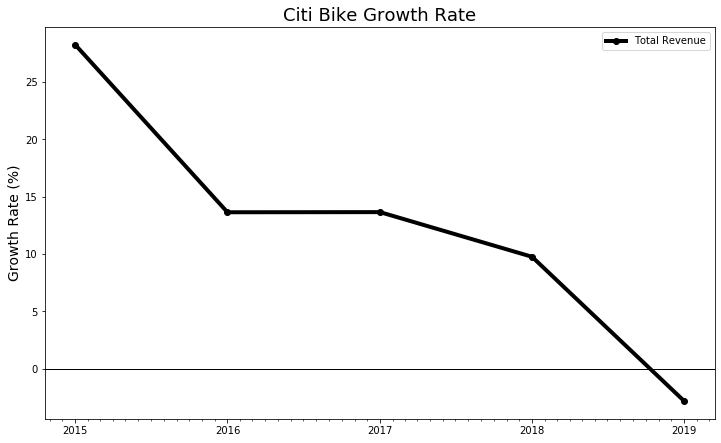

In [134]:
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.

# ax = plt.subplot(111)
fig, ax = plt.subplots(figsize=(12, 8))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

# ["red", "salmon","tan",'light_green','aqua_green','purple']
plt.plot( df_growth.index.values, df_growth[['Total Revenue']], marker='o',
         color='k', linewidth=4, label='Total Revenue')


plt.xlabel('') 
plt.ylabel('Growth Rate (%)',size=14)
plt.title('Citi Bike Growth Rate',size=18)
# plt.grid(which='major', axis='y')
plt.legend(loc=1)
plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('growth_rate_total.png') 
plt.show()

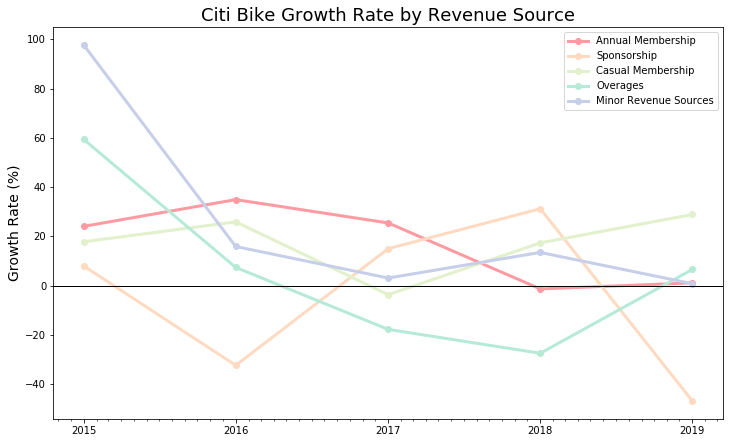

In [138]:
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.

# ax = plt.subplot(111)
fig, ax = plt.subplots(figsize=(12, 8))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()


# ["red", "salmon","tan",'light_green','aqua_green','purple']
plt.plot( df_growth.index.values, df_growth[['Annual Membership']], marker='o',
         color=color_dct["red"], linewidth=3, label='Annual Membership')

plt.plot( df_growth.index.values, df_growth[['Sponsorship']], marker='o',
         color=color_dct["tan"], linewidth=3, label='Sponsorship')

plt.plot( df_growth.index.values, df_growth[['Casual Membership']], marker='o',
         color=color_dct["light_green"], linewidth=3, label='Casual Membership')

plt.plot( df_growth.index.values, df_growth[['Overages']], marker='o',
         color=color_dct["aqua_green"], linewidth=3, label='Overages')

plt.plot( df_growth.index.values, df_growth[['Minor Revenue Sources']], marker='o',
         color=color_dct["purple"], linewidth=3, label='Minor Revenue Sources')

# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")


# x1 = df_growth[['Annual Membership']].plot(figsize=(15,8))
# df_growth[['Casual Membership']].plot(figsize=(15,8))
plt.xlabel('') 
plt.ylabel('Growth Rate (%)',size=14)
plt.title('Citi Bike Growth Rate by Revenue Source',size=18)
# plt.grid(which='major', axis='y')
plt.legend(loc=1)
plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('growth_rate_source.png') 
plt.show()

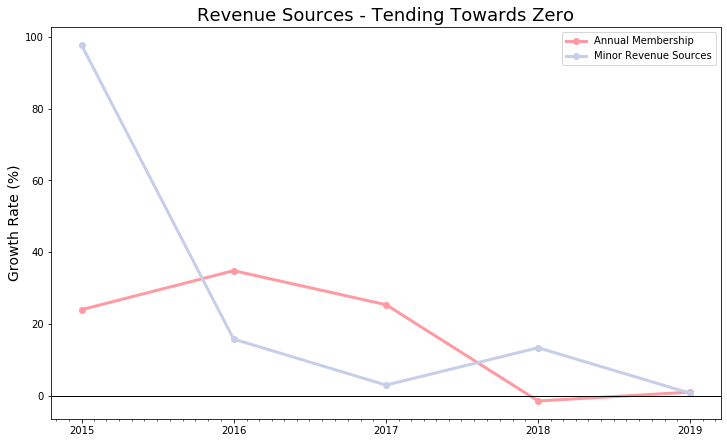

In [135]:
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.

# ax = plt.subplot(111)
fig, ax = plt.subplots(figsize=(12, 8))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

# ["red", "salmon","tan",'light_green','aqua_green','purple']
plt.plot( df_growth.index.values, df_growth[['Annual Membership']], marker='o',
         color=color_dct["red"], linewidth=3, label='Annual Membership')

# plt.plot( df_growth.index.values, df_growth[['Sponsorship']], marker='o',
#          color=color_dct["tan"], linewidth=3, label='Sponsorship')

# plt.plot( df_growth.index.values, df_growth[['Casual Membership']], marker='o',
#          color=color_dct["light_green"], linewidth=3, label='Casual Membership')

# plt.plot( df_growth.index.values, df_growth[['Overages']], marker='o',
#          color=color_dct["aqua_green"], linewidth=3, label='Overages')

plt.plot( df_growth.index.values, df_growth[['Minor Revenue Sources']], marker='o',
         color=color_dct["purple"], linewidth=3, label='Minor Revenue Sources')

# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")


# x1 = df_growth[['Annual Membership']].plot(figsize=(15,8))
# df_growth[['Casual Membership']].plot(figsize=(15,8))
plt.xlabel('') 
plt.ylabel('Growth Rate (%)',size=14)
plt.title('Revenue Sources - Tending Towards Zero',size=18)
# plt.grid(which='major', axis='y')
plt.legend(loc=1)
plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('growth_rate_towards_zero.png') 
plt.show()

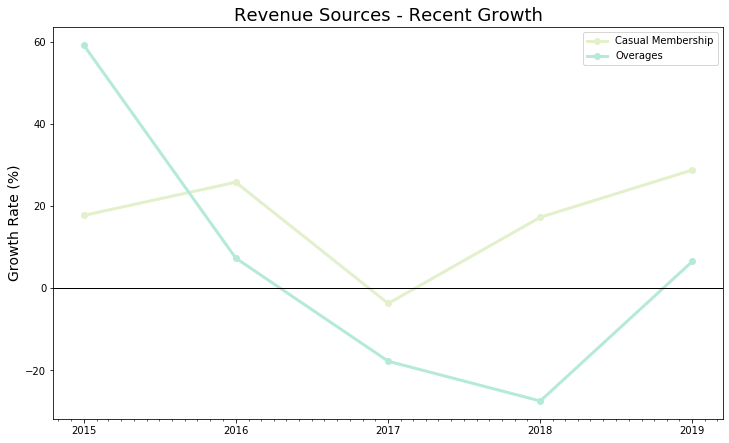

In [136]:
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.

# ax = plt.subplot(111)
fig, ax = plt.subplots(figsize=(12, 8))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()
# ["red", "salmon","tan",'light_green','aqua_green','purple']
# plt.plot( df_growth.index.values, df_growth[['Annual Membership']], marker='o',
#          color=color_dct["red"], linewidth=3, label='Annual Membership')

# plt.plot( df_growth.index.values, df_growth[['Sponsorship']], marker='o',
#          color=color_dct["tan"], linewidth=3, label='Sponsorship')

plt.plot( df_growth.index.values, df_growth[['Casual Membership']], marker='o',
         color=color_dct["light_green"], linewidth=3, label='Casual Membership')

plt.plot( df_growth.index.values, df_growth[['Overages']], marker='o',
         color=color_dct["aqua_green"], linewidth=3, label='Overages')

# plt.plot( df_growth.index.values, df_growth[['Minor Revenue Sources']], marker='o',
#          color=color_dct["purple"], linewidth=3, label='Minor Revenue Sources')

# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")


# x1 = df_growth[['Annual Membership']].plot(figsize=(15,8))
# df_growth[['Casual Membership']].plot(figsize=(15,8))
plt.xlabel('') 
plt.ylabel('Growth Rate (%)',size=14)
plt.title('Revenue Sources - Recent Growth',size=18)
# plt.grid(which='major', axis='y')
plt.legend(loc=1)
plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('growth_rate_recent_growth.png') 
plt.show()

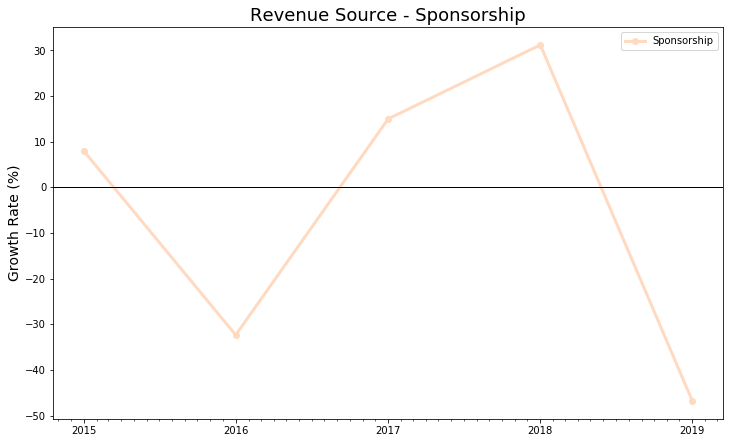

In [137]:
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.

# ax = plt.subplot(111)
fig, ax = plt.subplots(figsize=(12, 8))

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

# ["red", "salmon","tan",'light_green','aqua_green','purple']
# plt.plot( df_growth.index.values, df_growth[['Annual Membership']], marker='o',
#          color=color_dct["red"], linewidth=3, label='Annual Membership')

plt.plot( df_growth.index.values, df_growth[['Sponsorship']], marker='o',
         color=color_dct["tan"], linewidth=3, label='Sponsorship')

# plt.plot( df_growth.index.values, df_growth[['Casual Membership']], marker='o',
#          color=color_dct["light_green"], linewidth=3, label='Casual Membership')

# plt.plot( df_growth.index.values, df_growth[['Overages']], marker='o',
#          color=color_dct["aqua_green"], linewidth=3, label='Overages')

# plt.plot( df_growth.index.values, df_growth[['Minor Revenue Sources']], marker='o',
#          color=color_dct["purple"], linewidth=3, label='Minor Revenue Sources')

# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")


# x1 = df_growth[['Annual Membership']].plot(figsize=(15,8))
# df_growth[['Casual Membership']].plot(figsize=(15,8))
plt.xlabel('') 
plt.ylabel('Growth Rate (%)',size=14)
plt.title('Revenue Source - Sponsorship',size=18)
# plt.grid(which='major', axis='y')
plt.legend(loc=1)
plt.axhline(y=0, linewidth=1, color='k')
plt.savefig('growth_rate_sponsorship.png') 
plt.show()

In [56]:
df_growth

,Annual Membership,Sponsorship,Casual Membership,Overages,Minor Revenue Sources
0,NaN,NaN,NaN,NaN,NaN
1,24.059971,8.003709,17.790633,59.365002,97.694676
2,34.913505,-32.343771,25.883057,7.401445,15.888497
3,25.442055,15.004051,-3.673088,-17.753742,3.090525
4,-1.335582,31.214628,17.350394,-27.449292,13.477880
5,1.131891,-46.815342,28.876050,6.591270,0.811888


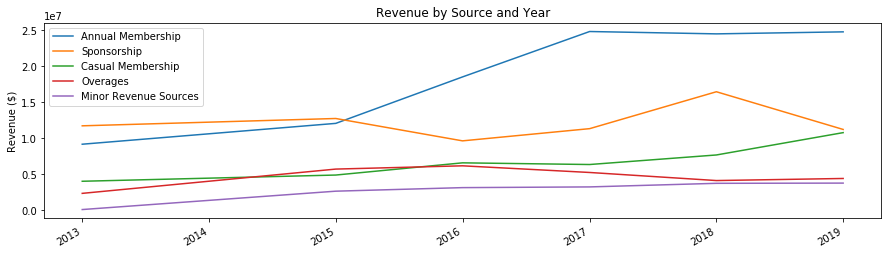

In [30]:
df_op_mod[col_names_mod].plot(figsize=(15,4))
plt.xlabel('')
plt.ylabel('Revenue ($)')
plt.title('Revenue by Source and Year')
plt.show()

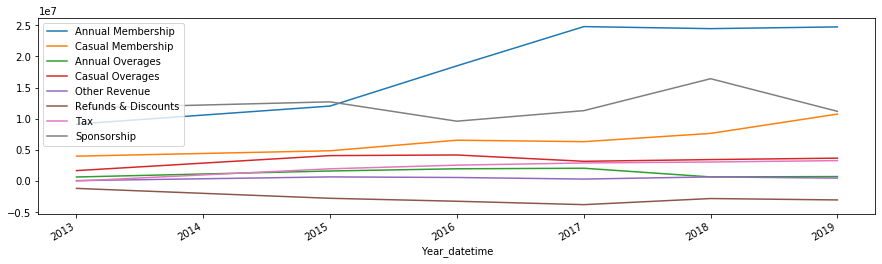

In [29]:
df_op[col_names].plot(figsize=(15,4))

In [7]:
col_names = df_op.columns.to_list()
print(len(col_names))

major_rev_sources = ['Annual Membership','Sponsorship','Casual Membership']
minor_rev_sources = ['Other Revenue','Tax']
membership_rev_sources = ['Annual Membership','Casual Membership']
overage_rev_sources = ['Casual Overages','Annual Overages']
costs = ['Refunds & Discounts']
master_list = ['Annual Membership','Sponsorship','Casual Membership'] + overage_rev_sources + minor_rev_sources + costs
len(master_list)


8


8